In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

from utils.dataset import load_dataset, split_data

from models.model_selection import ModelSelector

%matplotlib inline

Imported v0.1.904. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [2]:
# Load dataset and describe it

dataset_path = 'dataset/hcvdat0.csv'


hcv_df = load_dataset(dataset_path)
hcv_df = hcv_df[hcv_df.columns[1:]]  # remove first 'Unnamed' column
hcv_df.head(5)

print(f'Number of different categories: {hcv_df["Category"].value_counts()}')
# describe DataFrame
hcv_df.describe()

# Identify non-numeric columns and their unique values
for column in ['Category', 'Sex']:
    unique_values = hcv_df[column].unique()
    print(f'Unique values in column {column}:')
    print(unique_values)
    print('\n')

Number of different categories: Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64
Unique values in column Category:
['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


Unique values in column Sex:
['m' 'f']




In [3]:
# Transforming string values to numeric (Category, Sex) and filling nulls
category_mapping = {
    '0=Blood Donor': 0,
    '1=Hepatitis': 1,
    '2=Fibrosis': 2,
    '3=Cirrhosis': 3,
    '0s=suspect Blood Donor': 4
}

sex_mapping = {
    'm': 0,
    'f': 1
}

replacement_dict = {
    'Category': category_mapping,
    'Sex': sex_mapping
}

hcv_df.replace(replacement_dict, inplace=True)
hcv_df = hcv_df.fillna(method='ffill')
hcv_df.head(5)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Shape of your Data Set loaded: (615, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    13 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Category,int64,0.000000,0,0.000000,4.000000,Column has 82 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
Age,int64,0.000000,7,19.000000,77.000000,Column has 1 outliers greater than upper bound (76.50) or lower than lower bound(16.50). Cap them or remove them.
Sex,int64,0.000000,0,0.000000,1.000000,No issue
ALB,float64,0.000000,NA,14.900000,82.200000,Column has 27 outliers greater than upper bound (54.80) or lower than lower bound(29.20). Cap them or remove them.
ALP,float64,0.000000,NA,11.300000,416.600000,Column has 10 outliers greater than upper bound (122.02) or lower than lower bound(10.23). Cap them or remove them.
ALT,float64,0.000000,NA,0.900000,325.300000,Column has 37 outliers greater than upper bound (58.15) or lower than lower bound(-8.65). Cap them or remove them.
AST,float64,0.000000,NA,10.600000,324.000000,Column has 64 outliers greater than upper bound (49.85) or lower than lower bound(4.65). Cap them or remove them.
BIL,float64,0.000000,NA,0.800000,254.000000,Column has 47 outliers greater than upper bound (20.05) or lower than lower bound(-3.55). Cap them or remove them.
CHE,float64,0.000000,NA,1.420000,16.410000,Column has 24 outliers greater than upper bound (13.57) or lower than lower bound(2.95). Cap them or remove them.
CHOL,float64,0.000000,NA,1.430000,9.670000,Column has 12 outliers greater than upper bound (8.24) or lower than lower bound(2.42). Cap them or remove them.


Number of All Scatter Plots = 55


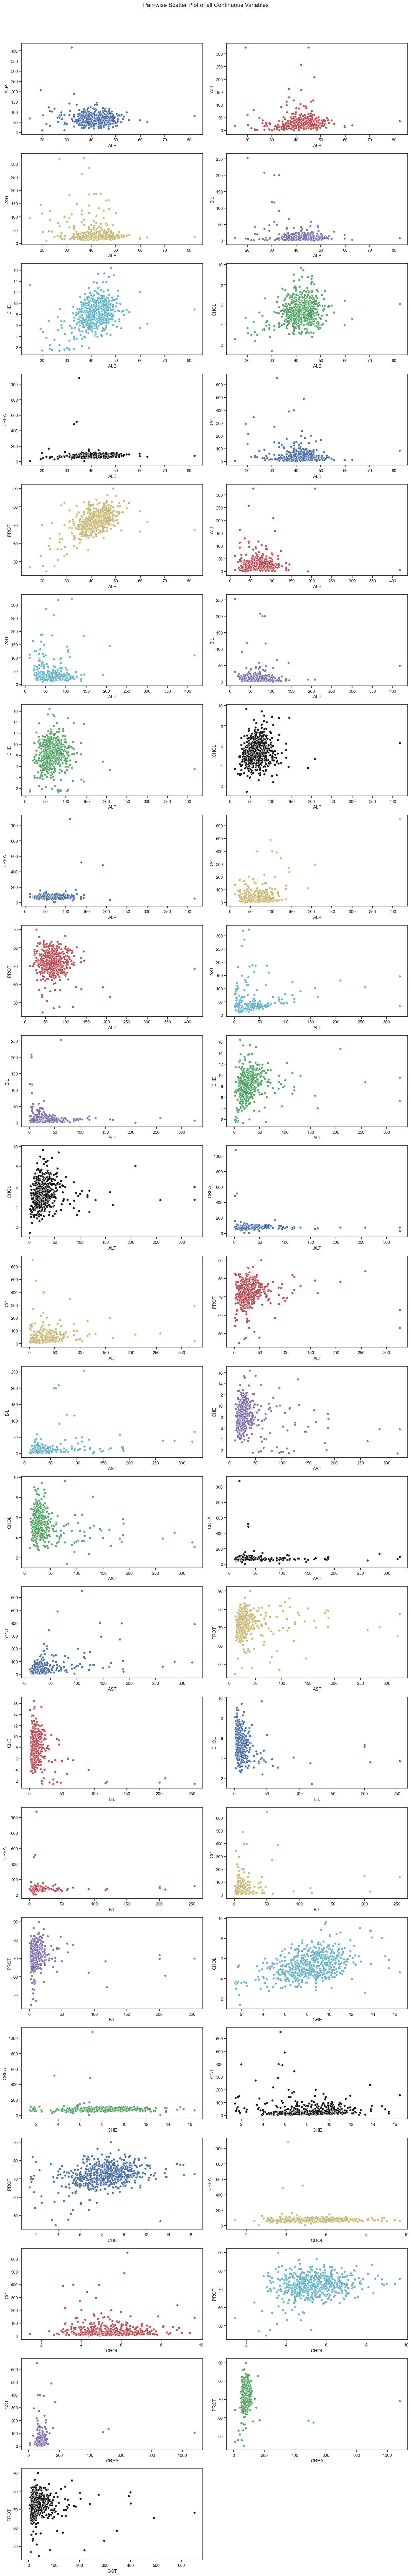

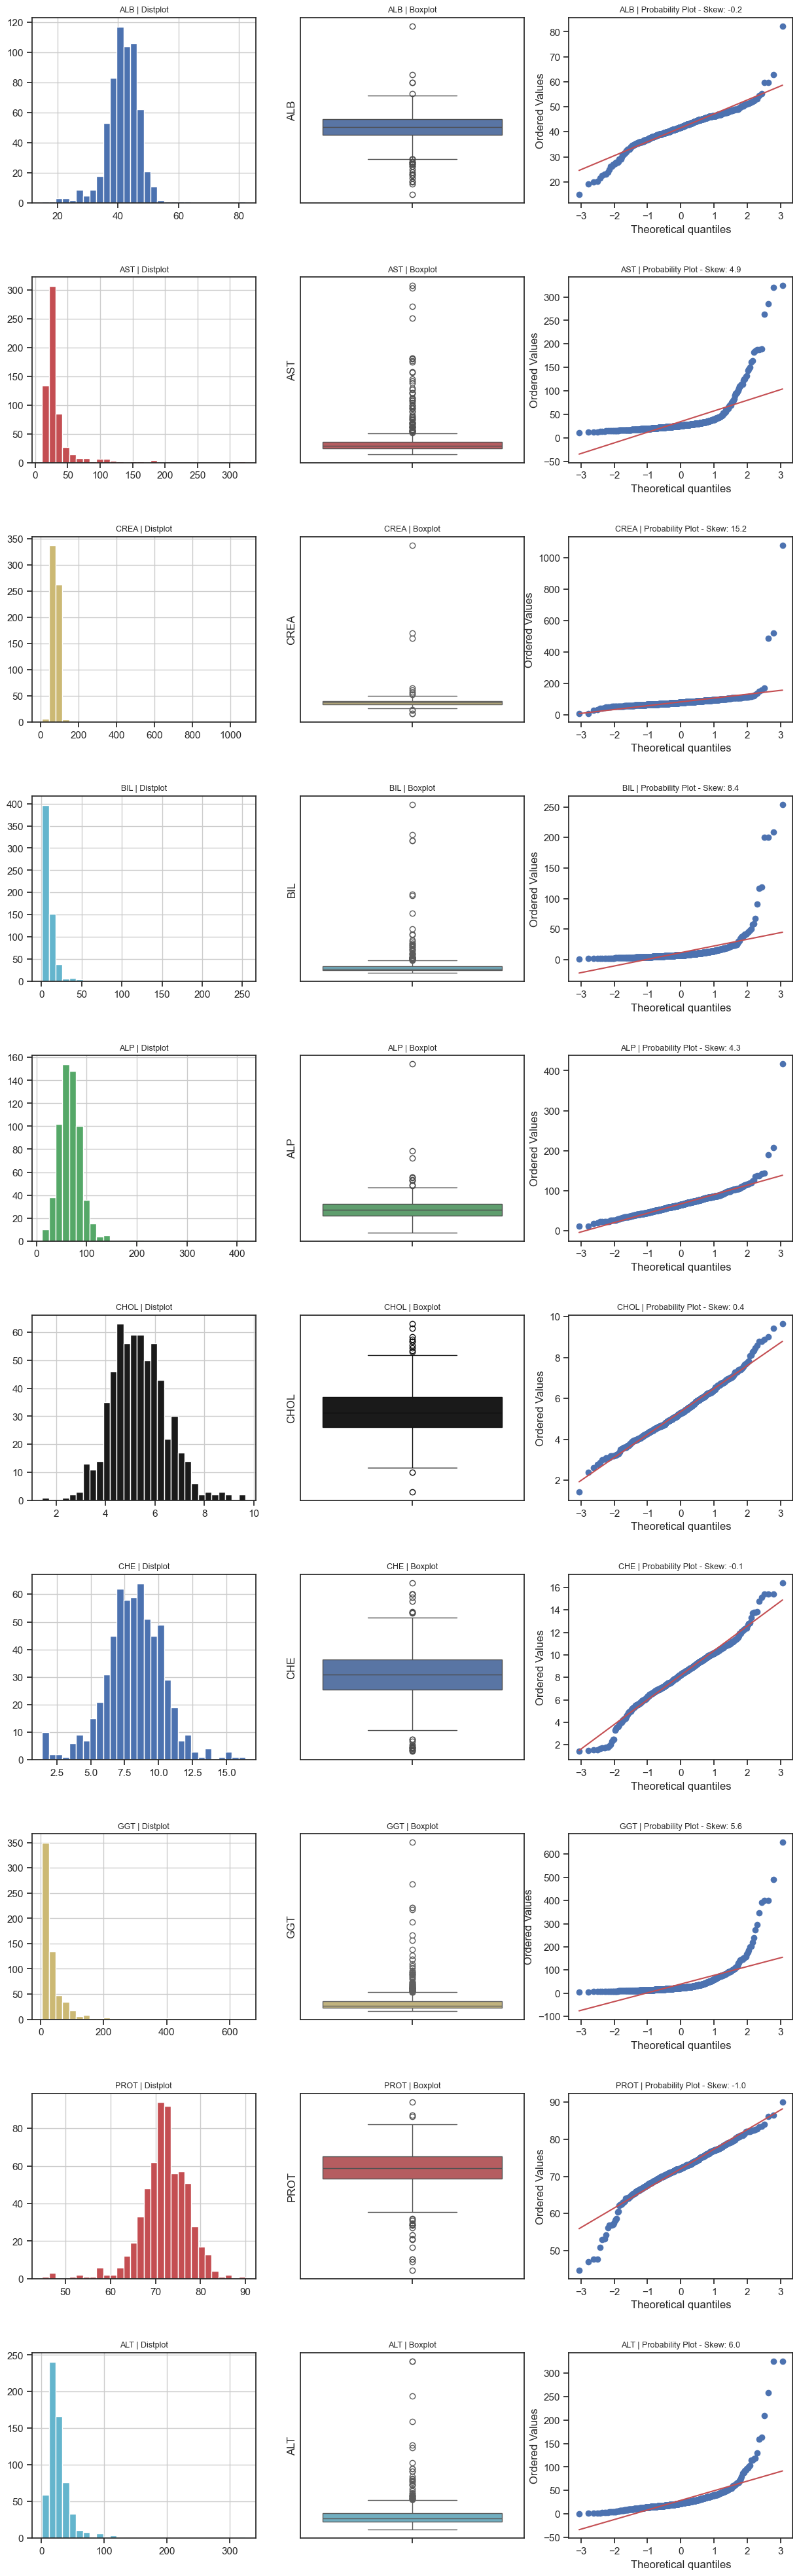

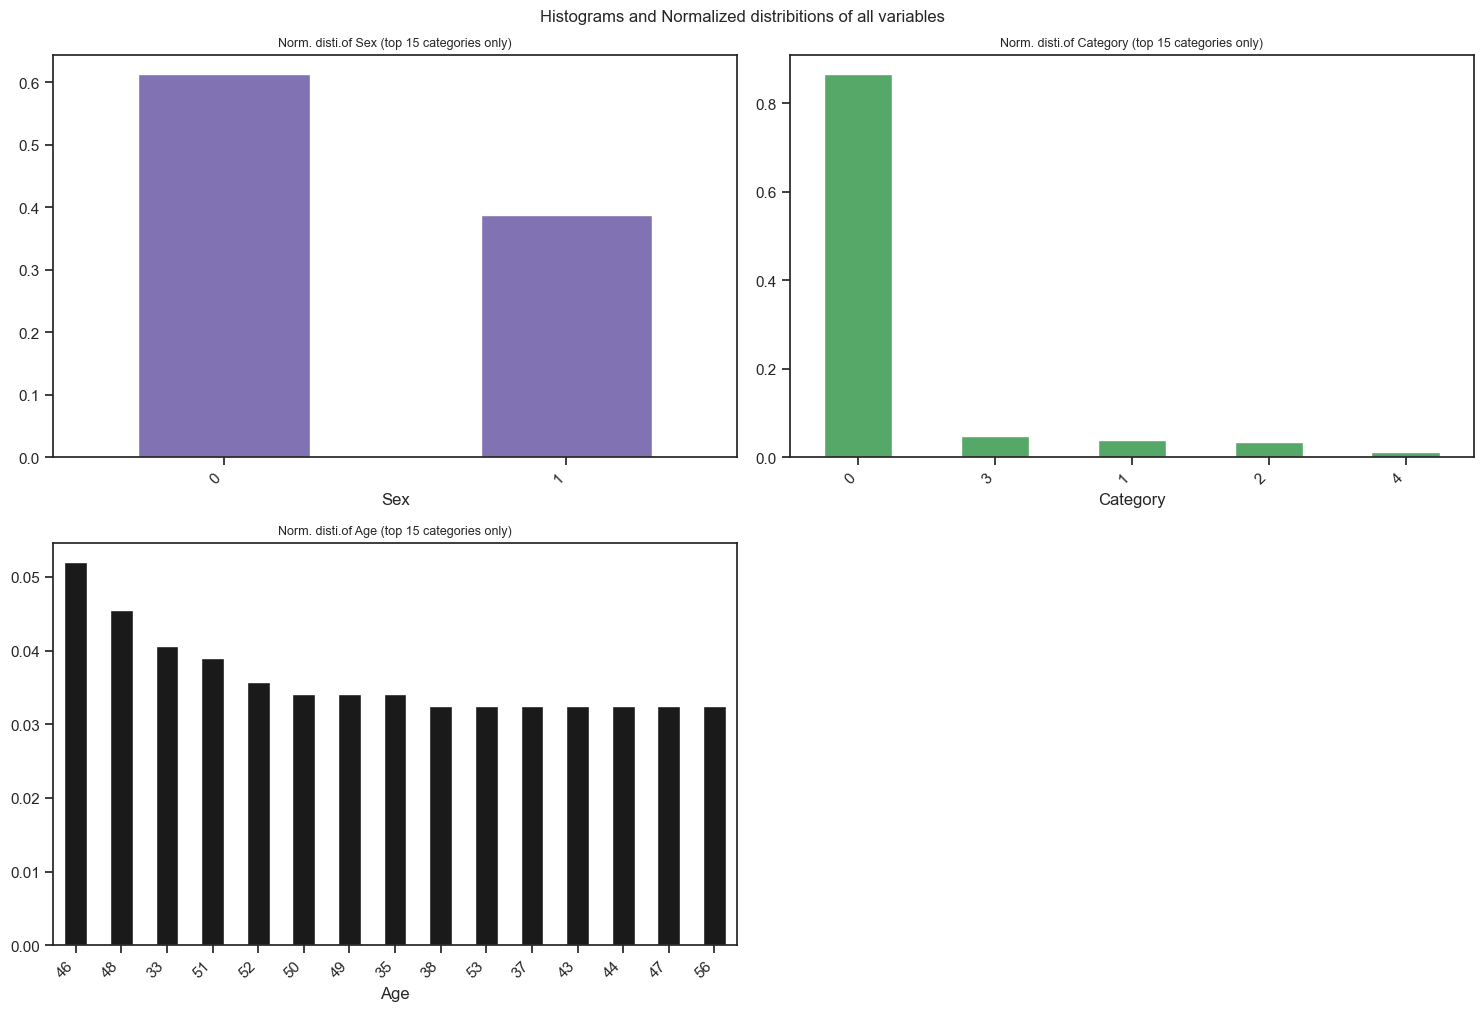

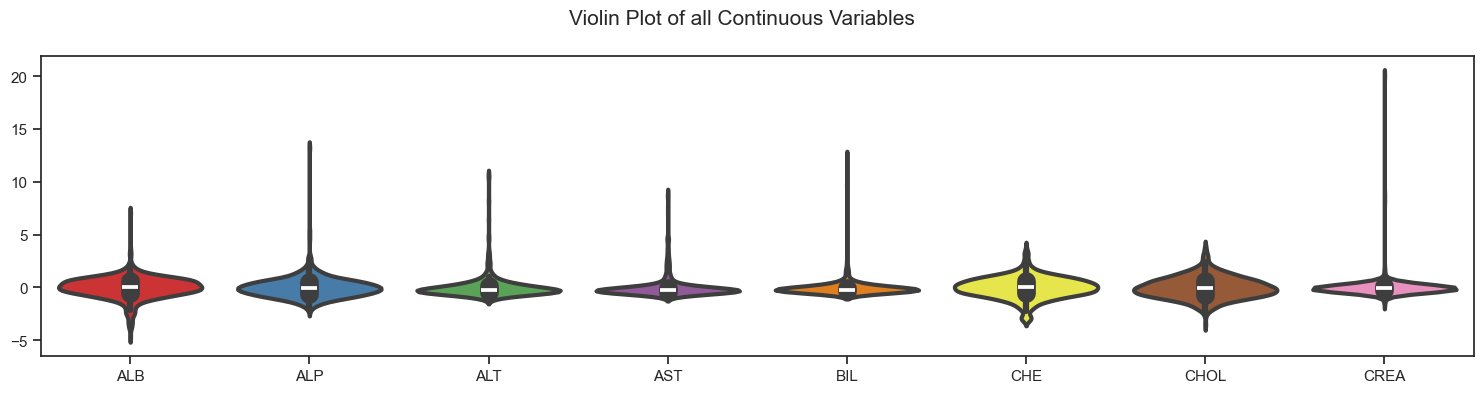

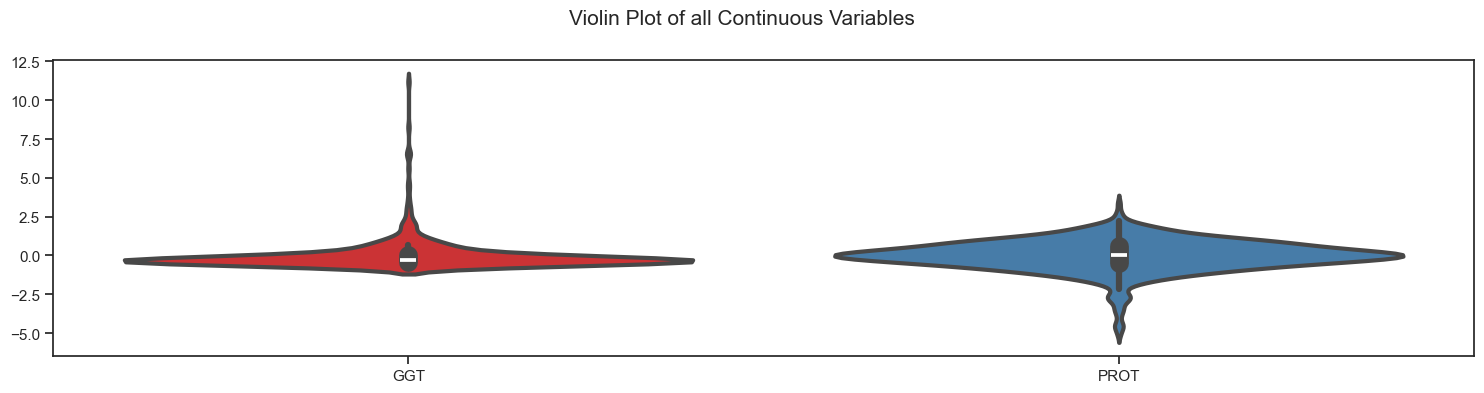

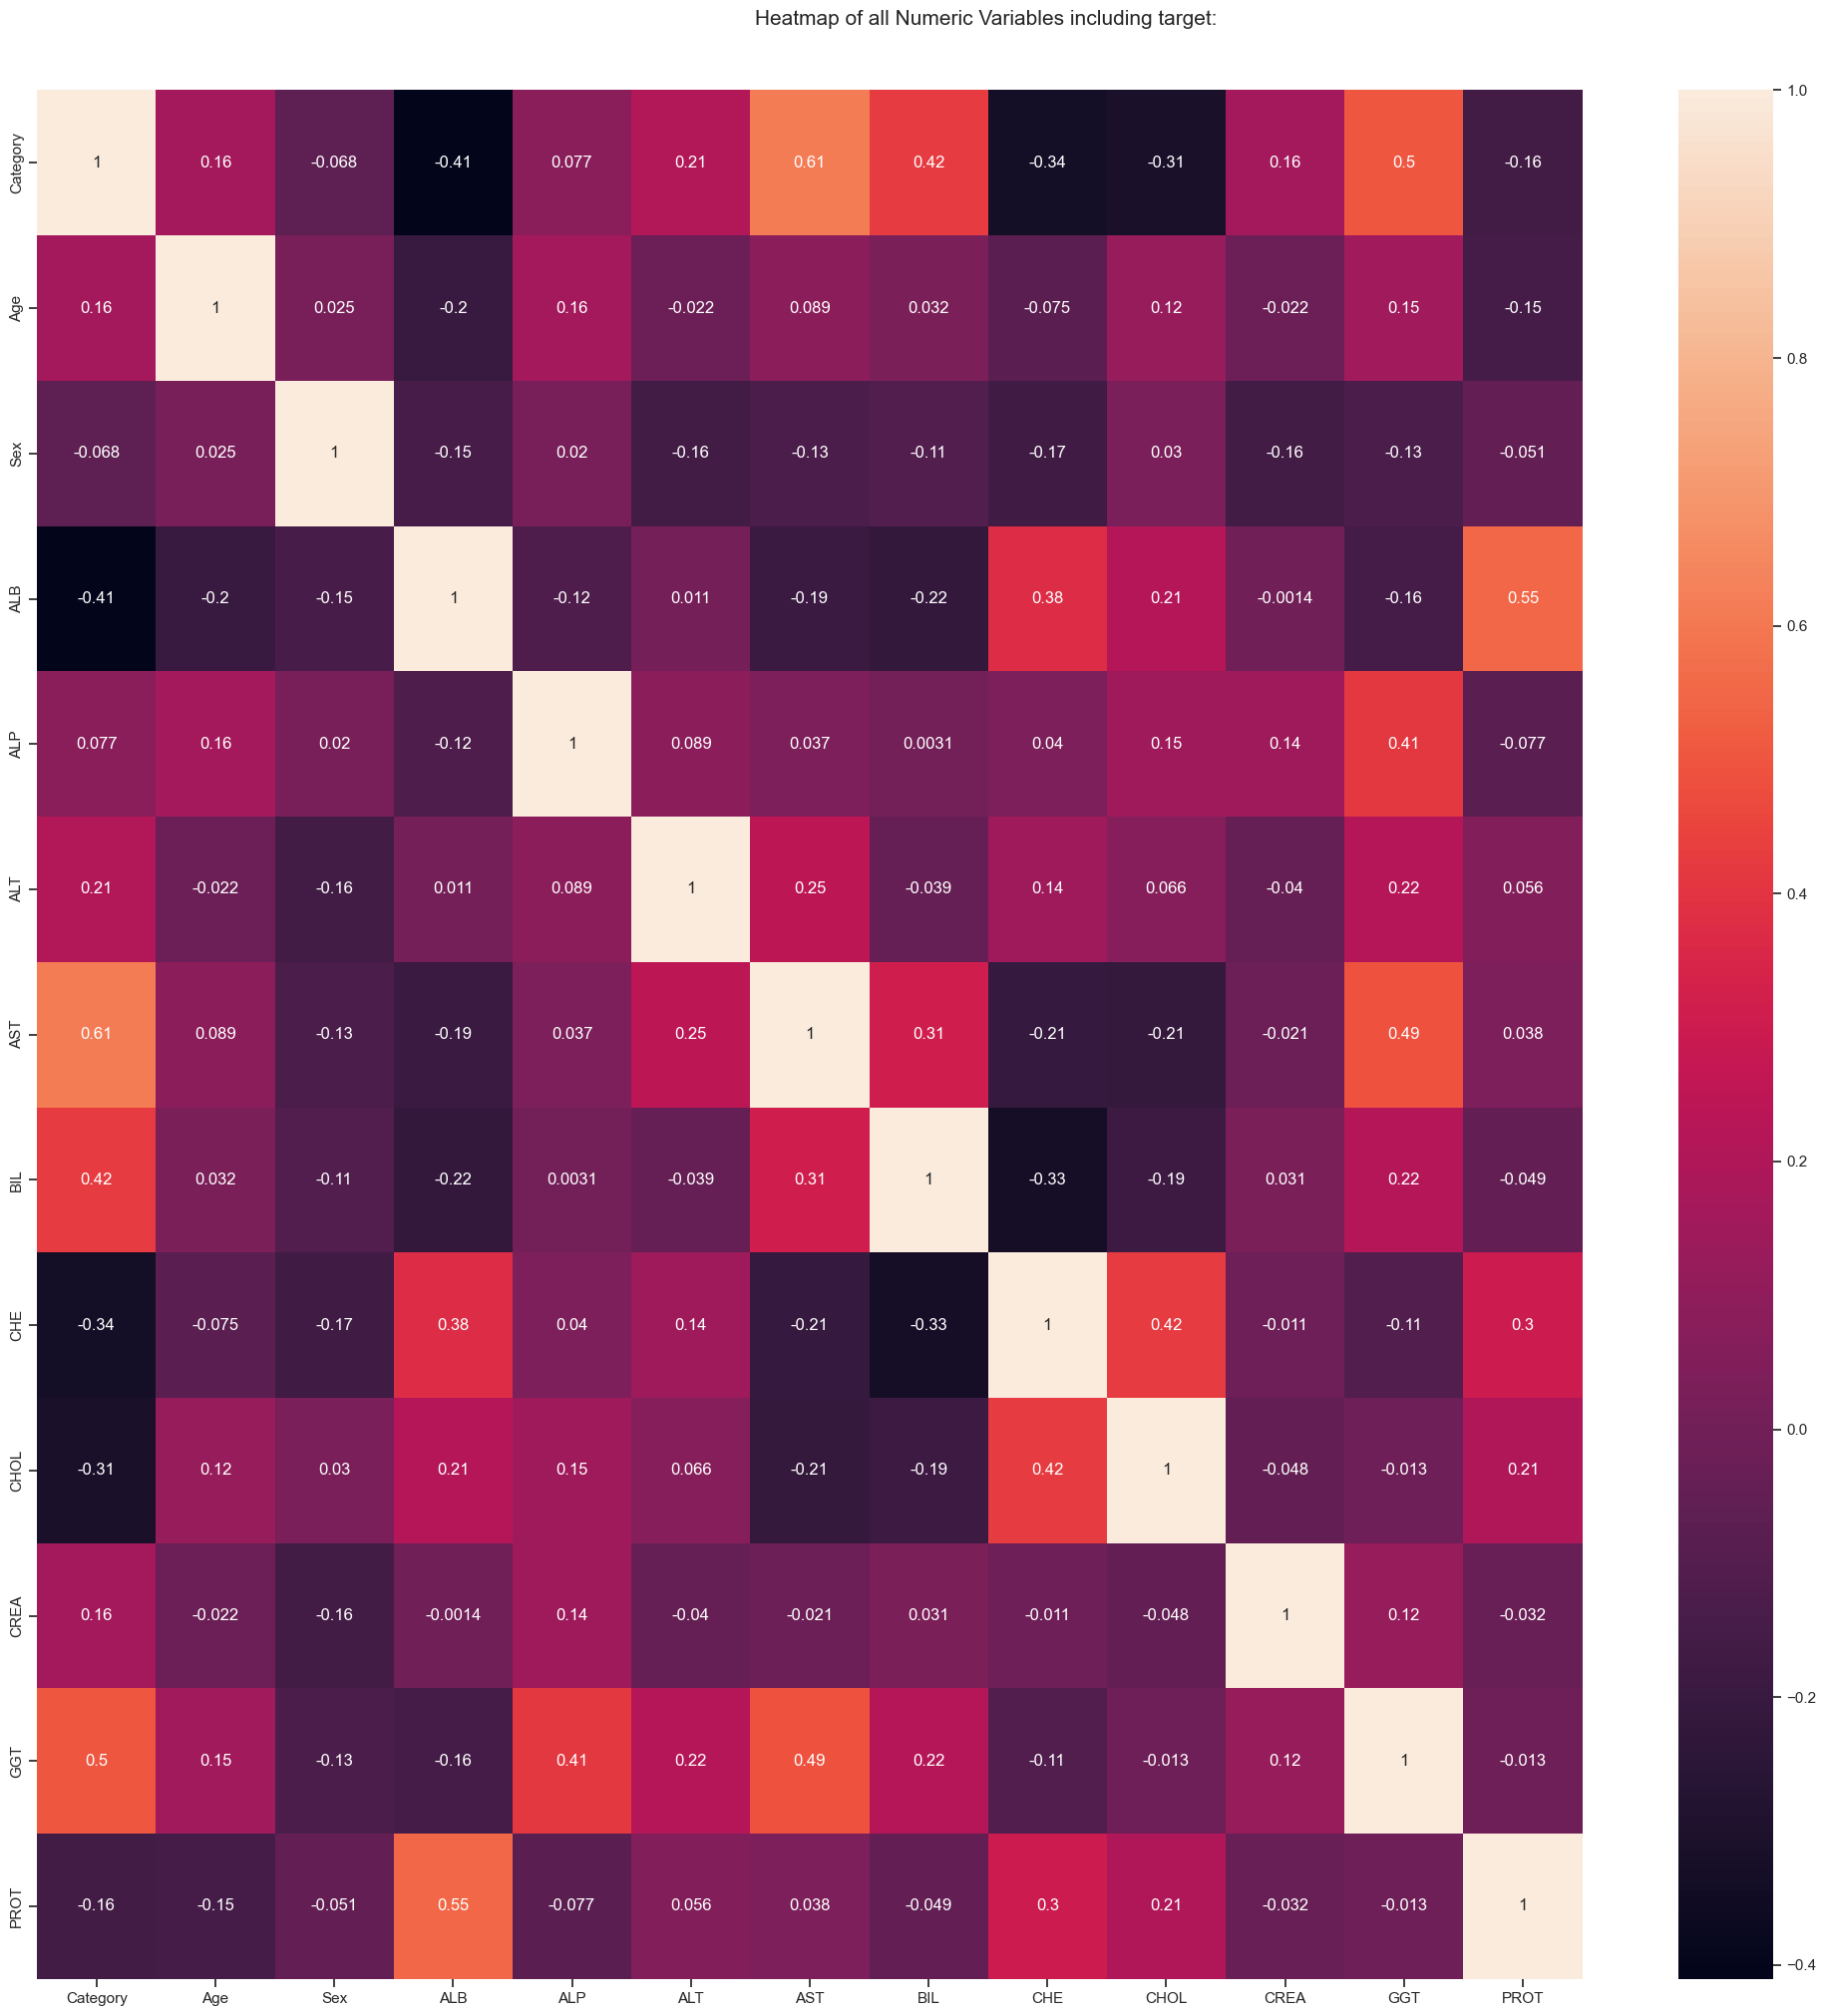

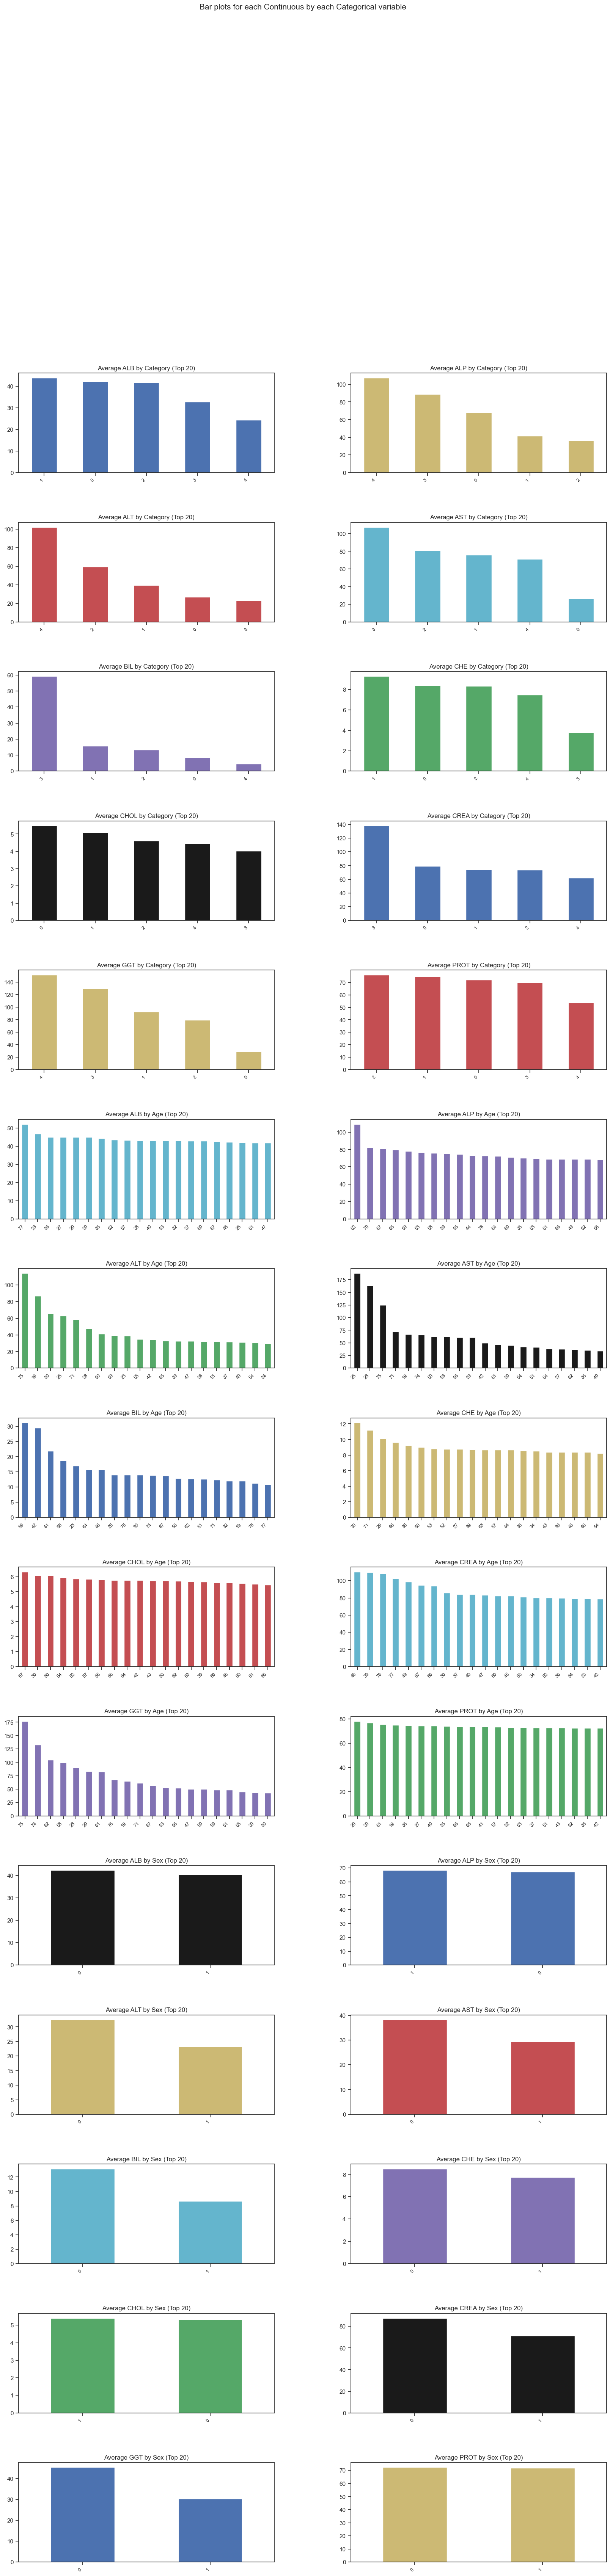

All Plots done
Time to run AutoViz = 16 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3,62,1,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3,64,1,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3,64,1,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3,46,1,33.0,87.3,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [4]:
# creating an AutoViz instance
AV = AutoViz_Class()

# generating data visualization automatically
AV.AutoViz(
    filename='',
    sep=',',
    depVar='',
    dfte=hcv_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format='svg',
    max_rows_analyzed=10000,
    max_cols_analyzed=30
)

<Axes: >

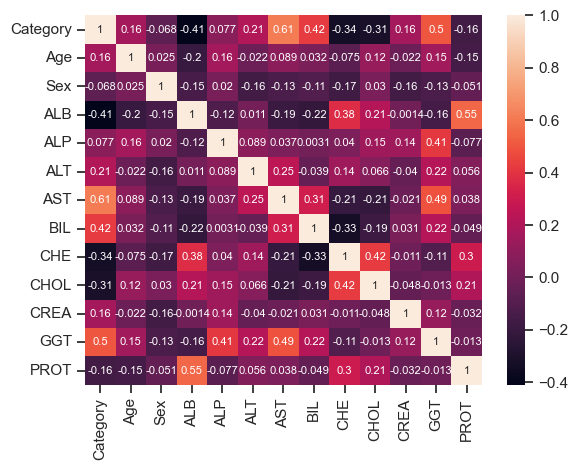

In [5]:
# Plot correlation between columns (features)

sns.heatmap(hcv_df.corr(), annot = True, annot_kws={'fontsize': 8})

In [6]:
# Split train and test data
y_label = 'Category'
X_train, X_test, y_train, y_test = split_data(hcv_df, y_label)

In [7]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (459, 13)
X_test dimension=  (156, 13)
y_train dimension=  (459,)
y_train dimension=  (156,)


In [8]:
# Initialize models with hyperparams v1
print('Training models with v1 hyperparameters...')
hyperparams_v1: dict = {
        'logistic': {'max_iter': 50, 'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.005},
        'n_bayes': {'alpha': 1.0},
        'rand_forest': {'n_estimators': 100, 'max_depth': 10, 'criterion': 'log_loss'}
    }

ms_1 = ModelSelector(hyperparams=hyperparams_v1)

# Select Logistic model

logistic_model = ms_1.select_model('logistic')
logistic_model.fit(X_train, y_train)

# Evaluate logistic model
print('Logistic Regression model:')
print('Training score:', logistic_model.score(X_train, y_train))
print('Test score:', logistic_model.score(X_test, y_test))

# Select Naive Bayes model
nb_model = ms_1.select_model('n_bayes')
nb_model.fit(X_train, y_train)

print('Naive Bayes model')
print('Training score:', nb_model.score(X_train, y_train))
print('Test score:', nb_model.score(X_test, y_test))

# Select random forest model
rf_model = ms_1.select_model('rand_forest')
rf_model.fit(X_train, y_train)

print('Random Forest model')
print('Training score:', rf_model.score(X_train, y_train))
print('Test score:', rf_model.score(X_test, y_test))

print('Training and evaluation for v1 hyperparams done.')


Training models with v1 hyperparameters...
Logistic Regression model:
Training score: 0.9607843137254902
Test score: 0.9038461538461539
Naive Bayes model
Training score: 0.9084967320261438
Test score: 0.8717948717948718
Random Forest model
Training score: 1.0
Test score: 0.9743589743589743
Training and evaluation for v1 hyperparams done.


In [37]:
# Plot bias-variance tradeoff for each mode
logistic_hyperparams = [
    {'max_iter': 100, 'solver': 'lbfgs', 'C': 0.000000005},
    {'max_iter': 100, 'solver': 'lbfgs', 'C': 0.00005},
    {'max_iter': 100, 'solver': 'lbfgs', 'C': 0.0005},
    {'max_iter': 100, 'solver': 'lbfgs', 'C': 0.005},
    {'max_iter': 100, 'solver': 'lbfgs', 'C': 0.05},
    {'max_iter': 100, 'solver': 'lbfgs', 'C': 0.5},
    {'max_iter': 100, 'solver': 'lbfgs', 'C': 500},
]

train_errors = []
test_errors = []


In [38]:
for idx, item in enumerate(logistic_hyperparams):
    selector = ModelSelector(
        hyperparams={
            'logistic': logistic_hyperparams[idx]
        }
    )
    
    model = selector.select_model('logistic')
    
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)
    
    # Calculate log loss (negative log likelihood)
    train_errors.append(log_loss(y_train, y_train_prob))
    test_errors.append(log_loss(y_test, y_test_prob))
    
    print('Train log loss: ', log_loss(y_train, y_train_prob))
    print('Test log loss: ', log_loss(y_test, y_test_prob))
    
    print(f'Training score:', model.score(X_train, y_train), 'for C=', item['C'])
    print('Test score:', model.score(X_test, y_test), 'for C=', item['C'])

Train log loss:  0.5548114148469281
Test log loss:  0.5900746154424873
Training score: 0.869281045751634 for C= 5e-09
Test score: 0.8589743589743589 for C= 5e-09
Train log loss:  0.25651574340402133
Test log loss:  0.5126148470410116
Training score: 0.9172113289760349 for C= 5e-05
Test score: 0.8653846153846154 for C= 5e-05
Train log loss:  0.17268880479495063
Test log loss:  0.7541362910844226
Training score: 0.9433551198257081 for C= 0.0005
Test score: 0.8910256410256411 for C= 0.0005
Train log loss:  0.10676098342416192
Test log loss:  0.8973141079492043
Training score: 0.9651416122004357 for C= 0.005
Test score: 0.9038461538461539 for C= 0.005
Train log loss:  0.06379008959457506
Test log loss:  1.1398612668795738
Training score: 0.971677559912854 for C= 0.05
Test score: 0.9102564102564102 for C= 0.05
Train log loss:  0.054333072473251365
Test log loss:  1.1859715632893664
Training score: 0.9803921568627451 for C= 0.5
Test score: 0.9038461538461539 for C= 0.5
Train log loss:  0.047

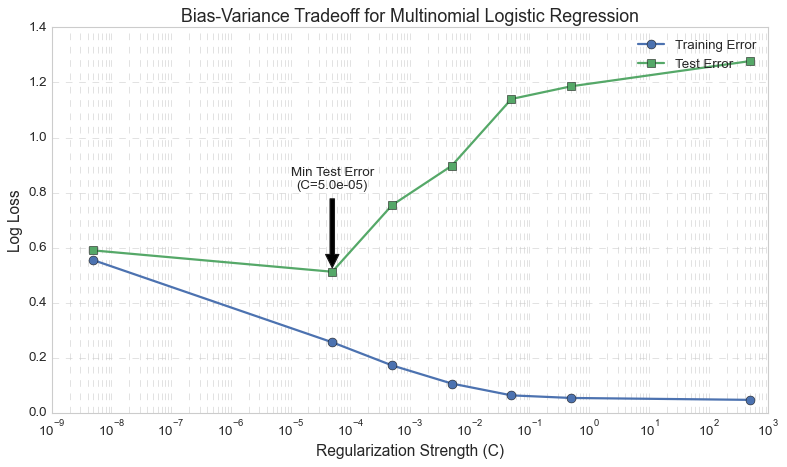

In [39]:
C_values = [0.000000005, 0.00005, 0.0005, 0.005, 0.05, 0.5, 500]

# Set style
plt.style.use("seaborn-v0_8-whitegrid")

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, label='Training Error', marker='o', markersize=8, linewidth=2)
plt.plot(C_values, test_errors, label='Test Error', marker='s', markersize=8, linewidth=2)

# Set log scale for x-axis
plt.xscale('log')

# Titles and labels
plt.xlabel('Regularization Strength (C)', fontsize=14)
plt.ylabel('Log Loss', fontsize=14)
plt.title('Bias-Variance Tradeoff for Multinomial Logistic Regression', fontsize=16)

# Grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

# Annotate minimum test error point
min_test_error_idx = np.argmin(test_errors)
min_test_error = test_errors[min_test_error_idx]
min_C_value = C_values[min_test_error_idx]
plt.annotate(f'Min Test Error\n(C={min_C_value:.1e})',
             xy=(min_C_value, min_test_error),
             xytext=(min_C_value, min_test_error + 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             ha='center')

# Show plot
plt.tight_layout()
plt.show()